In [1]:
import matplotlib.pyplot as plt
import torch as t
import torch.nn as nn
import numpy as np
from sklearn import datasets

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
## loading data
data = datasets.load_breast_cancer()
X, y = data.data, data.target

In [5]:
##splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [6]:
##scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [7]:
##shape of data
N,D = X_train.shape
print(N,D)

426 30


In [8]:
##Creating model with sigmoid to scale data between (0,1)
model = nn.Sequential(nn.Linear(D,1), nn.Sigmoid())

In [9]:
J = nn.BCELoss()
optimizer = t.optim.Adam(model.parameters(), lr = 0.01)

In [10]:
##Transform data into torch tensors

X_train = t.from_numpy(X_train.astype(np.float32))
X_test = t.from_numpy(X_test.astype(np.float32))

y_train = t.from_numpy(y_train.astype(np.float32))
y_test = t.from_numpy(y_test.astype(np.float32))

In [11]:
epochs = 100


Trainlosses = []
Testlosses = []

for epoch in range(epochs):
    
    ##zero the gradients parameters
    optimizer.zero_grad()
    
    outputs = model(X_train)
    
    loss = J(outputs, y_train)
    
    
    Trainlosses.append(loss.item())
    
    loss.backward()
    
    optimizer.step()
    #########################
    
    outputs_test = model(X_test)
    
    loss_test = J(outputs_test, y_test)
    
    Testlosses.append(loss_test.item())

C:\Users\GABRIEL\AppData\Local\Programs\Python\Python36\lib\site-packages\torch\nn\functional.py:2016: UserWarning: Using a target size (torch.Size([426])) that is different to the input size (torch.Size([426, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))
C:\Users\GABRIEL\AppData\Local\Programs\Python\Python36\lib\site-packages\torch\nn\functional.py:2016: UserWarning: Using a target size (torch.Size([143])) that is different to the input size (torch.Size([143, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


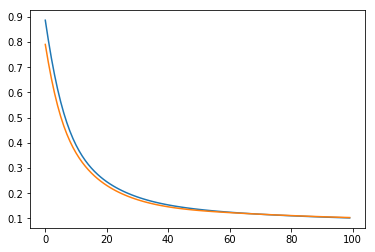

In [12]:
plt.plot(Trainlosses, label = 'Train losses')
plt.plot(Testlosses, label = 'Test losses')